<a href="https://colab.research.google.com/github/leonardoapolinario/polynomialRegression/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-09 17:28:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-02-09 17:28:01 (1.89 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


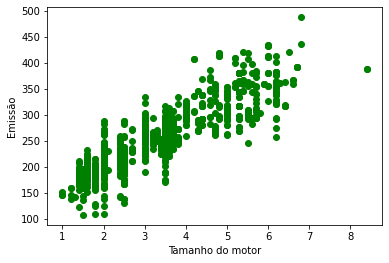

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('Tamanho do motor')
plt.ylabel('Emissão')
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Às vezes, a linha dos dados não é linear, e se parece curva. Nesse caso, nós podemos utilizar modelos de regressão polinomial. Na realidade, muitas regressões diferentes existem que podem ser utilizadas para se ajustar independente da aparência do dataset, como quadrático, cúbico, e por aí vai, como podemos ter um graus infinitos.

Em essência, nós podemos chamar todas essas, regressões polinomiais, onde o relacionamento entre a variável independente x e a variável dependente y é modelado como enésimo grau polinomial em x. Vamos dizer que nós queremos ter uma regressão polinomial (façamos grau 2):


$$y = b + \theta_1  x + \theta_2 x^2$$

Agora a questão é: como podemos ajustar nossos dados nessa equação enquanto temos apenas valores de x, como o **Tamanho do motor**? 
Bem, podemos criar características adicionais: 1, $x$, and $x^2$.

**PolynomialFeatures()** função na biblioteca Scikit-learn, produz um novo conjunto de características do conjunto original. Isto é, a matriz será gerada consistindo de todas as combinações polinomiais das características com grau menor ou igual ao grau especificado. Por exemplo, vamos dizer que o conjunto de características originais tem apenas uma feature, _TAMANHODOMOTOR_. Agora, se nós selecionarmos um grau polinomial 2, então ele produzirá 3 características, grau=0, grau=1 e grau=2

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** pega nossos valores x, e retorna uma lista dos nossos dados elevados de 0 a 2 (pois o grau polinomial é 2).   

A equação e a amostra de exemplo é exibida abaixo.   

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


Parece com o conjunto de características da regressão linear múltipla certo? De fato a regressão polinomial é um caso especial de regressão linear, com a ideia principal de como você seleciona as suas features. Basta considerar subistituir o $x$ por $x_1$, $x_1^2$ por $x_2$, e assim sucessivamente. Então a equação grau dois será transformada:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Agora, podemos ligar com ela como um problema de regressão linear. Então, essa regressão linear é considerada um caso especial de regressão linear múltipla tradicional. Então, podemos usar um mesmo mecanismo como a regressão linear para resolver este problema. 

Então podemos usar a função **LinearRegression()** para resolvê-lo: